# Clustering method on urban road accidents using K-Means, Gaussian Mixture Model (GMM), and DBSCAN

# 1. Data Preparation

For this assignment I chose dataset about coordinates (longitude, latitude) of road accidents occurred in urban areas in Great Britain [1].

In [ ]:
import pandas as pd
from zipfile import ZipFile
from sklearn.preprocessing import StandardScaler

zip_file_path = 'urbangb+urban+road+accidents+coordinates+labelled+by+the+urban+center.zip'

with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()

df = pd.read_csv('urbanGB.txt', header=None, names=['Longitude', 'Latitude'])

print("Dataset:")
print(df.head())

# Data preprocessing
# Reducing the dataset
df = df.sample(n=10000, random_state=42)

# Handling missing values
df.dropna(inplace=True)

# Scaling
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

X = df

print("\nPreprocessed Dataset:")
print(X.head())

Dataset:
   Longitude  Latitude
0  -0.310990   53.7802
1  -3.112550   55.8706
2  -0.088533   51.3806
3  -0.326795   51.4476
4  -3.946530   51.6594

Preprocessed Dataset:
        Longitude  Latitude
174938   0.482543 -0.370866
48728   -0.818115 -0.777922
277733   0.155409  1.454619
8606     1.934891 -0.376333
81479    1.128084 -0.872032


In [ ]:
# Visualizing the results using PCA for dimensionality reduction
def plot(X, title, column_name):
   # Scatter plot for clustering
  plt.scatter(df['Longitude'], df['Latitude'], c=df[column_name], cmap='viridis')
  plt.title(title)
  plt.xlabel('Longitude')
  plt.ylabel('Latitude')
  plt.show()

# 2. K-Means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

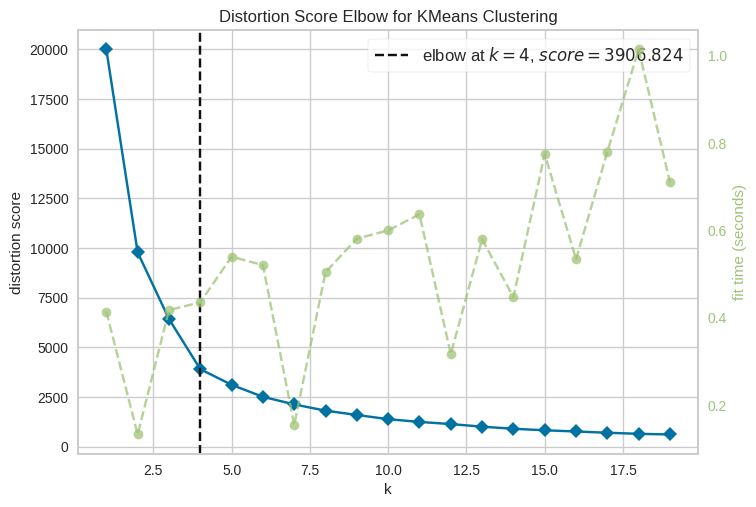

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

# Finding the optimal number of clusters using the Elbow method
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 20))
visualizer.fit(X)
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


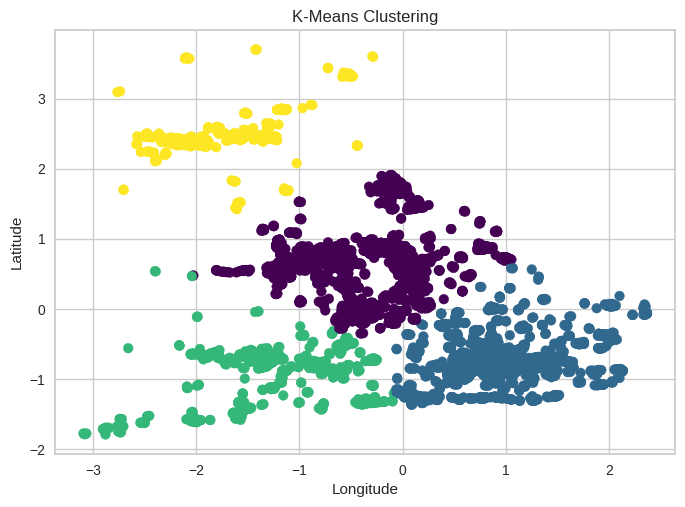

Silhouette Score: 0.6706831059502165


In [ ]:
# Applying K-Means clustering with the optimal K
kmeans = KMeans(n_clusters=4)
df['KMeans_Cluster'] = kmeans.fit_predict(X)

plot(X, 'K-Means Clustering', 'KMeans_Cluster')

# Evaluating clustering using silhouette score
silhouette_avg = silhouette_score(X, df['KMeans_Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# 3. Gaussian Mixture Models (GMM) Clustering

In [ ]:
from sklearn.mixture import GaussianMixture

# Implementing the Gaussian Mixture Models (GMM) clustering algorithm
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)

n_components=2, covariance_type=full: Silhouette Score = 0.33172944147194244
n_components=2, covariance_type=tied: Silhouette Score = 0.5292426122458367
n_components=2, covariance_type=diag: Silhouette Score = 0.5292426122458375
n_components=2, covariance_type=spherical: Silhouette Score = 0.30225806236862646
n_components=3, covariance_type=full: Silhouette Score = 0.6370927265219353
n_components=3, covariance_type=tied: Silhouette Score = 0.6370927265219353
n_components=3, covariance_type=diag: Silhouette Score = 0.6370927265219353
n_components=3, covariance_type=spherical: Silhouette Score = 0.5463917350306178
n_components=4, covariance_type=full: Silhouette Score = 0.7102491711167223
n_components=4, covariance_type=tied: Silhouette Score = 0.7040185144369381
n_components=4, covariance_type=diag: Silhouette Score = 0.7102491711167223
n_components=4, covariance_type=spherical: Silhouette Score = 0.7040185144369381
n_components=5, covariance_type=full: Silhouette Score = 0.719805191764

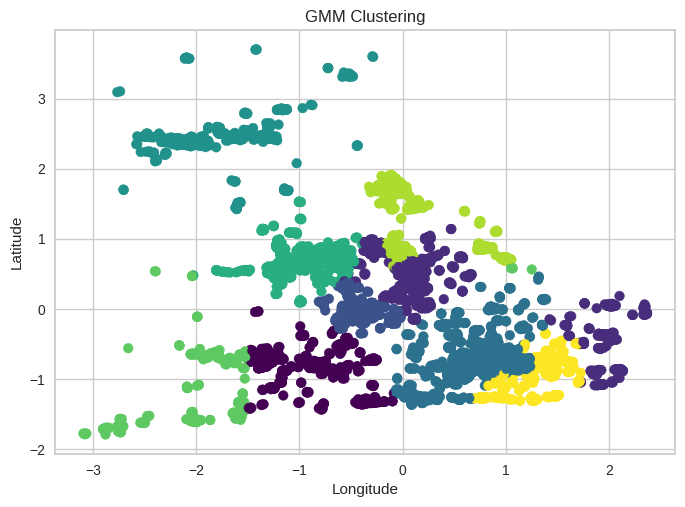

In [ ]:
# Hyperparameter tuning
best_silhouette_score = -1
best_n_components = -1
best_covariance_type = ''

for n_components in range(2, 11):
    for covariance_type in ['full', 'tied', 'diag', 'spherical']:
        # Creating GMM model with current hyperparameters
        gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type, random_state=42)
        df['GMM_Cluster'] = gmm.fit_predict(X)

        # Calculating silhouette score
        silhouette_avg = silhouette_score(X, df['GMM_Cluster'])

        print(f"n_components={n_components}, covariance_type={covariance_type}: Silhouette Score = {silhouette_avg}")

        # Updating best hyperparameters if a better silhouette score is obtained
        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_n_components = n_components
            best_covariance_type = covariance_type

# Best hyperparameters
print(f"Best Hyperparameters: n_components={best_n_components}, covariance_type={best_covariance_type}, best_silhouette_score={best_silhouette_score}")

# Applying GMM clustering with the best hyperparameters
gmm = GaussianMixture(n_components=best_n_components, covariance_type=best_covariance_type, random_state=42)
df['GMM_Cluster'] = gmm.fit_predict(X)

plot(X, 'GMM Clustering', 'GMM_Cluster')

# 4. DBSCAN Clustering

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

# Implementing the DBSCAN clustering algorithm
dbscan = DBSCAN(eps=0.5, min_samples=5)

Silhouette Score: 0.9211159805067498
eps=0.10, min_samples=3: Silhouette Score = 0.9211159805067498
Silhouette Score: 0.9170694116136374
eps=0.10, min_samples=4: Silhouette Score = 0.9170694116136374
Silhouette Score: 0.9083969406121097
eps=0.10, min_samples=5: Silhouette Score = 0.9083969406121097
Silhouette Score: 0.9019081439710817
eps=0.10, min_samples=6: Silhouette Score = 0.9019081439710817
Silhouette Score: 0.8995446792923248
eps=0.10, min_samples=7: Silhouette Score = 0.8995446792923248
Silhouette Score: 0.8912457759869797
eps=0.10, min_samples=8: Silhouette Score = 0.8912457759869797
Silhouette Score: 0.8884192916028806
eps=0.10, min_samples=9: Silhouette Score = 0.8884192916028806
Silhouette Score: 0.8849299907365766
eps=0.10, min_samples=10: Silhouette Score = 0.8849299907365766
Silhouette Score: 0.9252724012420332
eps=0.20, min_samples=3: Silhouette Score = 0.9252724012420332
Silhouette Score: 0.921445141625874
eps=0.20, min_samples=4: Silhouette Score = 0.921445141625874
S

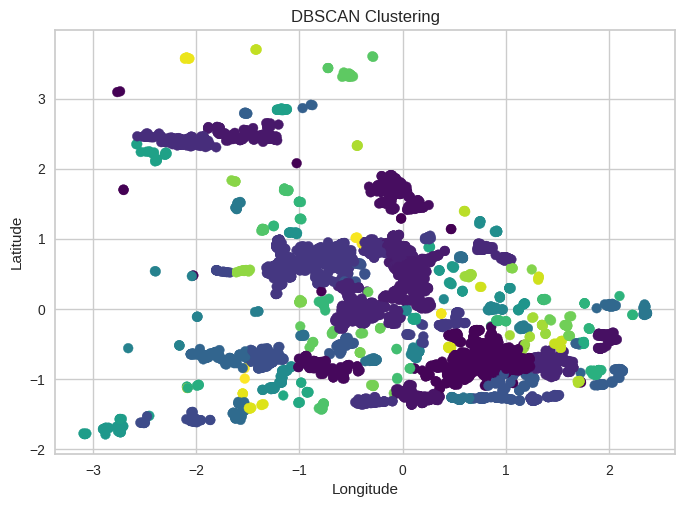

In [ ]:
# Defining a range of values for 'eps' and 'min_samples' to experiment with
eps_values = np.linspace(0.1, 1.0, 10)
min_samples_values = range(3, 11)

best_silhouette_score = -1
best_eps = None
best_min_samples = None

# Iterating over different combinations of hyperparameters
for eps in eps_values:
    for min_samples in min_samples_values:
        # Creating DBSCAN model with current hyperparameters
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        df['DBSCAN_Cluster'] = dbscan.fit_predict(X)

        # Check if there are more than one cluster before computing Silhouette Score
        unique_labels = df['DBSCAN_Cluster'].unique()
        if len(unique_labels) > 1:
            silhouette_avg = silhouette_score(X, df['DBSCAN_Cluster'])
            print(f"Silhouette Score: {silhouette_avg}")
        else:
            # print("DBSCAN resulted in only one cluster, Silhouette Score cannot be computed.")
            continue

        print(f"eps={eps:.2f}, min_samples={min_samples}: Silhouette Score = {silhouette_avg}")

        # Updating best hyperparameters if a better silhouette score is obtained
        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_eps = eps
            best_min_samples = min_samples

# Best hyperparameters
print(f"Best Hyperparameters: eps={best_eps:.2f}, min_samples={best_min_samples}, best_silhouette_score={best_silhouette_score}")

# Applying DBSCAN clustering with the best hyperparameters
best_dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
df['DBSCAN_Cluster'] = best_dbscan.fit_predict(X)

plot(X, 'DBSCAN Clustering', 'DBSCAN_Cluster')

# 5. Evaluation and Comparison

In [ ]:
from sklearn.metrics import davies_bouldin_score

def evaluate(labels, name):
  # Davies-Bouldin Index
  davies_bouldin_kmeans = davies_bouldin_score(X, labels)
  print(f"\nDavies-Bouldin Index for {name}: {davies_bouldin_kmeans}")

  # Silhouette Score
  silhouette_kmeans = silhouette_score(X, labels)
  print(f"Silhouette Score for {name}: {silhouette_kmeans}")

In [ ]:
# K-Means
kmeans_labels = KMeans(n_clusters=4, random_state=42).fit_predict(X)

# Gaussian Mixture Model
gmm_labels = GaussianMixture(n_components=9, covariance_type='tied', random_state=42).fit_predict(X)

# DBSCAN
dbscan_labels = DBSCAN(eps=0.60, min_samples=3).fit_predict(X)

evaluate(kmeans_labels, 'K-Means')
evaluate(gmm_labels, 'Gaussian Mixture Model')
evaluate(dbscan_labels, 'DBSCAN')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Davies-Bouldin Index for K-Means: 0.5933499462789744
Silhouette Score for K-Means: 0.5452582350271673

Davies-Bouldin Index for Gaussian Mixture Model: 0.6706309672477108
Silhouette Score for Gaussian Mixture Model: 0.5932378884091648

Davies-Bouldin Index for DBSCAN: 0.17319956035604808
Silhouette Score for DBSCAN: 0.9264379959976433


**Summarizing: On the given dataset, K-Means, Gaussian Mixture Model (GMM), and DBSCAN were used for clustering analysis. K-Means and GMM performed similarly, demonstrating modest cluster separation and compactness, making them ideal for datasets with roughly spherical clusters. They are, however, sensitive to initial centroids and may struggle with irregularly formed clusters. In terms of well-defined and well-separated clusters, DBSCAN excelled, displaying tolerance to noise and outliers. It might have difficulty with clusters of varying densities, and hyperparameters must be carefully adjusted. Overall, the clustering method should be chosen based on the properties of the data, with K-Means and GMM being appropriate for uniform clusters and DBSCAN excelling in scenarios with unevenly shaped and varied-density clusters.**

References

[1] UrbanGB, urban road accidents coordinates labelled by the urban center (2019) UCI Machine Learning Repository. Available at: https://archive.ics.uci.edu/dataset/550/urbangb+urban+road+accidents+coordinates+labelled+by+the+urban+center